In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [54]:
COLS=pd.read_csv('data/bondcourt/CCHHS_SUD_details.csv',index_col=0).columns
ID=pd.read_csv('data/bondcourt/CCHHS_SUD_details.csv',index_col=0).index.values
df=pd.DataFrame(pd.read_csv('data/bondcourt/CCHHS_SUD_details.csv',index_col=0).values,columns=COLS)
df.index=ID

df.to_csv('data/bondcourt.csv',index=None)
print(df.isna().sum(axis=1).mean())



157.632


In [55]:
df

,11713,6294,6295,6296,6297,6298,6299,6300,6301,6302,...,6456,6457,6458,6459,6460,6461,6462,6463,6464,6465
49723,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49724,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49728,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49729,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49730,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89614,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
89679,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
90638,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
91322,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [56]:
Tr=truthnet()
## load data and infer qnet
features,samples = Tr.load_data(datapath="data/bondcourt.csv")

Tr.fit(fit=True,modelpath="results/bondcourt.joblib")
Tr.getDissonance(outfile="mpi_tmp/bondcourt_dissonance.csv",processes=11)

In [57]:
samples

array([['1.0', '1.0', '', ..., '0.0', '0.0', '0.0'],
       ['', '2.0', '', ..., '0.0', '0.0', '0.0'],
       ['', '1.0', '', ..., '0.0', '0.0', '0.0'],
       ...,
       ['', '1.0', '', ..., '0.0', '0.0', '0.0'],
       ['', '2.0', '', ..., '0.0', '0.0', '0.0'],
       ['', '2.0', '', ..., '0.0', '0.0', '0.0']], dtype='<U3')

In [58]:
suspects,usamples=Tr.getSuspects(alpha=.001,return_samples=True)
usamples

,6294,6296,6298,6314,6315,6317,6319,6325,6326,6327,...,6411,6412,6421,6422,6426,6427,6436,6463,6464,6465
0,1.0,2.0,1.0,4.0,4.0,4.0,2.0,1.0,,1.0,...,1.0,2.0,5.0,5.0,4.0,9.0,5.0,0.0,0.0,0.0
1,1.0,1.0,,3.0,3.0,4.0,2.0,1.0,1.0,1.0,...,1.0,5.0,4.0,,1.0,1.0,4.0,0.0,0.0,0.0
2,,2.0,1.0,3.0,2.0,2.0,4.0,1.0,,1.0,...,,2.0,2.0,1.0,1.0,3.0,5.0,0.0,0.0,0.0
3,2.0,2.0,1.0,1.0,1.0,3.0,4.0,,,1.0,...,2.0,1.0,3.0,1.0,4.0,6.0,2.0,0.0,0.0,0.0
4,2.0,2.0,,3.0,2.0,4.0,2.0,,,1.0,...,5.0,3.0,,4.0,,,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,,,...,3.0,3.0,1.0,2.0,3.0,9.0,5.0,0.0,0.0,0.0
1246,1.0,2.0,1.0,4.0,3.0,2.0,1.0,2.0,1.0,,...,1.0,2.0,,2.0,2.0,4.0,,0.0,0.0,0.0
1247,,2.0,1.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,...,,,,1.0,5.0,9.0,2.0,0.0,0.0,0.0
1248,1.0,1.0,,2.0,4.0,1.0,3.0,2.0,1.0,1.0,...,2.0,3.0,,,1.0,3.0,4.0,0.0,0.0,0.0


,mean_dissonance,11713,6294,6295,6296,6297,6298,6299,6300,6301,...,6456,6457,6458,6459,6460,6461,6462,6463,6464,6465
52997,0.206593,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
71607,0.214298,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
71672,0.229650,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
73645,0.211538,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
79156,0.220317,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
82730,0.219654,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


<AxesSubplot:>

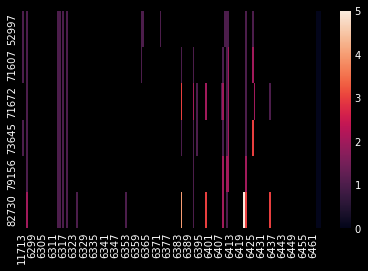

In [59]:
sf=suspects.join(pd.read_csv("data/bondcourt.csv",names=COLS))
sf.index=ID[sf.index]
display(sf)
import seaborn as sns
plt.style.use('dark_background')

sns.heatmap(sf.drop('mean_dissonance',axis=1))

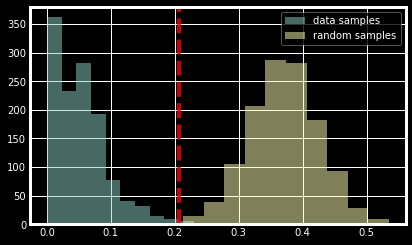

In [60]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(Tr.cithreshold[('suspect',0.001)][0], color="red", linestyle="--", alpha=.8)

In [66]:
coresamples,vsamples=Tr.getCoresamples(alpha=.01,steps=128,return_samples=True)


QUEUEING TASKS | :   0%|          | 0/1250 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1250 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1250 [00:00<?, ?it/s]

In [67]:
vsamples

,6294,6296,6298,6314,6315,6317,6319,6325,6326,6327,...,6411,6412,6421,6422,6426,6427,6436,6463,6464,6465
0,1,2,1,1,1,1,2,1,1,1,...,1,1,4,4,1,1,1,0,0,0
1,1,2,1,1,1,1,1,2,1,,...,1,4,5,1,1,1,1,0,0,0
2,1,2,1,1,1,1,1,1,1,1,...,4,1,1,2,2,5,2,0,0,0
3,1,2,1,1,2,,,1,1,2,...,,1,2,1,1,1,4,0,0,0
4,2,,1,1,1,4,2,1,1,2,...,1,2,5,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1,1,1,1,1,1,1,2,1,2,...,2,1,4,1,1,6,1,0,0,0
1246,1,1,1,2,1,1,2,,1,2,...,1,1,4,2,3,9,4,0,0,0
1247,1,1,1,1,1,1,1,2,1,2,...,1,2,2,2,4,4,1,0,0,
1248,1,,1,1,2,1,2,1,1,1,...,1,3,1,1,1,1,1,0,0,0


In [63]:
coresamples.join(pd.read_csv("data/bondcourt.csv",names=COLS))

,mean_dissonance,11713,6294,6295,6296,6297,6298,6299,6300,6301,...,6456,6457,6458,6459,6460,6461,6462,6463,6464,6465
0,0.000000,11713.0,6294.0,6295.0,6296.0,6297.0,6298.0,6299.0,6300.0,6301.0,...,6456.0,6457.0,6458.0,6459.0,6460.0,6461.0,6462.0,6463.0,6464.0,6465.0
1,0.071663,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,0.108699,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,0.071256,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
7,0.151374,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.110107,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1244,0.090768,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1245,0.079407,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1247,0.033218,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


(array([  2.,  20.,  56., 141., 223., 323., 243., 157.,  60.,  25.]),
 array([0.35555556, 0.37777778, 0.4       , 0.42222222, 0.44444444,
        0.46666667, 0.48888889, 0.51111111, 0.53333333, 0.55555556,
        0.57777778]),
 <BarContainer object of 10 artists>)

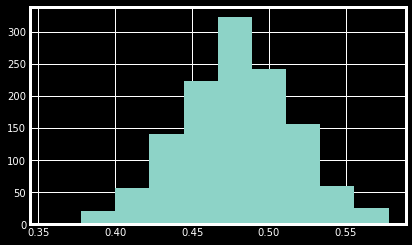

In [64]:
plt.hist(Tr.null_dissonance_df.mean(axis=1))

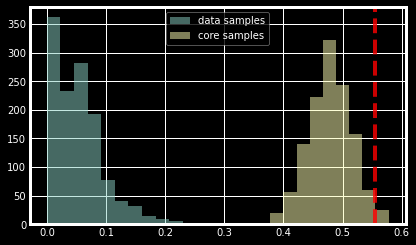

In [65]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["core"] = Tr.null_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["core"], alpha=0.5, label="core samples")
plt.legend()
plt.axvline(Tr.cithreshold[('core',0.01)][1], color="red", linestyle="--", alpha=.8)

In [ ]:
Tr.cithreshold

In [ ]:
        def random_sample_model(self,
                                type='uniform',
                                df=None,
                                n=1,
                                steps=None,
                                n_jobs=None):
    
            COLS=self.qnet.feature_names
            nullstr = np.array(['']*COLS)
            self.qnet.predict_distributions(nullstr)


In [68]:
import random
numsample=10
COLS=Tr.cognet_obj.qnet.feature_names
nullstr = np.array(['']*len(COLS))
pdict=Tr.cognet_obj.qnet.predict_distributions(nullstr)
Us=np.array([np.array([random.choice(tuple(x.keys())) for x in pdict]) for i in np.arange(numsample)])
pd.DataFrame(Us,columns=COLS)

,6294,6296,6298,6314,6315,6317,6319,6325,6326,6327,...,6411,6412,6421,6422,6426,6427,6436,6463,6464,6465
0,2.0,1.0,1.0,4.0,1.0,3.0,3.0,2.0,1.0,1.0,...,5.0,2.0,1.0,4.0,2.0,9.0,2.0,0.0,0.0,0.0
1,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,1.0,5.0,4.0,1.0,1.0,4.0,4.0,0.0,0.0,0.0
2,2.0,2.0,1.0,3.0,4.0,3.0,1.0,2.0,1.0,2.0,...,2.0,3.0,4.0,1.0,4.0,7.0,1.0,0.0,0.0,0.0
3,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,...,2.0,4.0,3.0,1.0,3.0,6.0,2.0,0.0,0.0,0.0
4,2.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,5.0,4.0,4.0,3.0,0.0,0.0,0.0
5,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,...,3.0,2.0,5.0,2.0,1.0,5.0,4.0,0.0,0.0,0.0
6,2.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,...,5.0,1.0,4.0,2.0,4.0,3.0,1.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,2.0,...,4.0,1.0,4.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0
8,1.0,2.0,1.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,...,4.0,1.0,4.0,1.0,5.0,9.0,5.0,0.0,0.0,0.0
9,2.0,2.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0,2.0,...,1.0,2.0,4.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0


In [69]:
COLS

['6294',
 '6296',
 '6298',
 '6314',
 '6315',
 '6317',
 '6319',
 '6325',
 '6326',
 '6327',
 '6328',
 '6348',
 '6352',
 '6353',
 '6356',
 '6358',
 '6362',
 '6363',
 '6366',
 '6373',
 '6374',
 '6382',
 '6385',
 '6386',
 '6387',
 '6390',
 '6391',
 '6392',
 '6393',
 '6394',
 '6399',
 '6400',
 '6408',
 '6409',
 '6410',
 '6411',
 '6412',
 '6421',
 '6422',
 '6426',
 '6427',
 '6436',
 '6463',
 '6464',
 '6465']

In [45]:
! cat data/bondcourt.csv

11713,6294,6295,6296,6297,6298,6299,6300,6301,6302,6303,6304,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314,6315,6316,6317,6318,6319,6320,6321,6322,6323,6324,6325,6326,6327,6328,6329,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,6344,6345,6346,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6404,6405,6406,6407,6408,6409,6410,6411,6412,6413,6414,6415,6416,6417,6418,6419,6420,6421,6422,6423,6424,6425,6426,6427,6428,6429,6430,6431,6432,6433,6434,6435,6436,6437,6438,6439,6440,6441,6442,6443,6444,6445,6446,6447,6448,6449,6450,6451,6452,6453,6454,6455,6456,6457,6458,6459,6460,6461,6462,6463,6464,6465
,1.0,,1.0,,,,,,,,,,,,,,,,,,1.0,1.0,,1.0,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,1.0,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,